# Flyback Converter Design
![Schematic](resources/schmatic.png)

# Imports and Settings

In [18]:
from resources.FlybackSimulation import FlybackSimulation
from matplotlib import pyplot as plt

# Plot settings
PLOT_FOREGROUND_COLORS = 'white'
PLOT_BACKGROUND_COLOR = '#272822'   # pyplot background color (#272822 matches VS Code's monokai theme)
plt.rcParams['axes.facecolor']      = PLOT_BACKGROUND_COLOR 
plt.rcParams['xtick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['ytick.color']         = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.edgecolor']      = PLOT_FOREGROUND_COLORS
plt.rcParams['axes.labelcolor']     = PLOT_FOREGROUND_COLORS
plt.rcParams['legend.labelcolor']   = PLOT_FOREGROUND_COLORS

# Input parameters

In [5]:
Vin = 311       # Input voltage (VIN) 32V to 78V
Vout = 12       # Output voltage (VOUT)
Iout = 1        # Output current (IOUT)
OpMode = "DCM"  # Operation mode
KFR = 1         # Ripple factor (KFR) 1
Dmax = 0.5      # Maximum duty cycle (DMAX) 0.5
fs = 160e3      # Switching frequency (fSW) 160kHz
eff = 0.8       # Estimated efficiency (η)  80%

# Derived values

In [22]:
N=10; print(f"{N=}")
D=Vout/(Vin/N); print(f"{D=}")
Ts=1/fs
DT = D*Ts
dI = 10
L=Vin*D**2/(fs*dI); print(f"{L=:.3}")

N=10
D=0.3858520900321543
L=2.89e-05


In [7]:
simulation = FlybackSimulation()
simulation.generate_flyback_netlist()
simulation.begin()
simulation.read_outputs()

Calling Ngspice for generated netlist...

ngspice compiled from ngspice revision 31
Written originally by Berkeley University
Currently maintained by the NGSpice Project

Copyright (C) 1985-1996,  The Regents of the University of California
Copyright (C) 1999-2011,  The NGSpice Project
Available waveforms: ['t', 'Vds', 'Vout', 'Ip', 'Is']


Text(0, 0.5, 'Vds (V)')

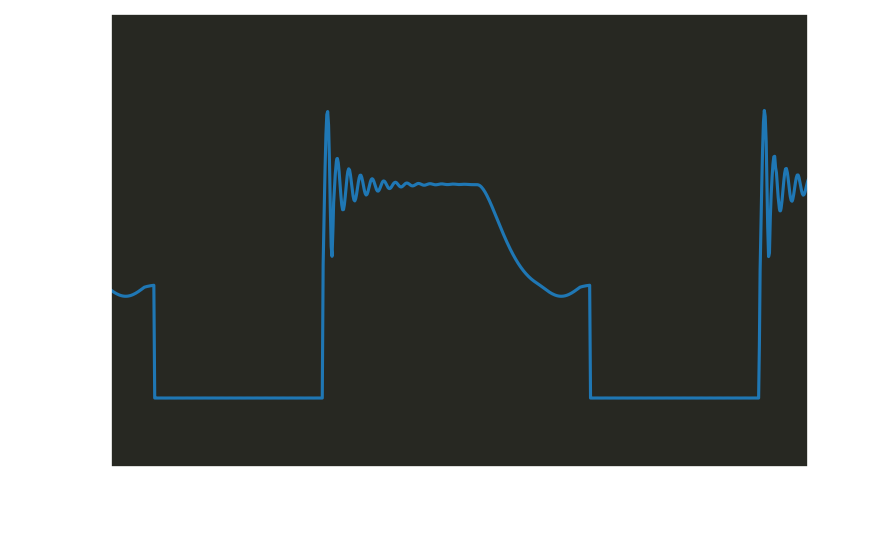

In [11]:
plt.figure(dpi=150)
simulation.plot()
plt.xlim(290e-6, 300e-6); plt.xlabel("time (s)"); plt.ylabel("Vds (V)")

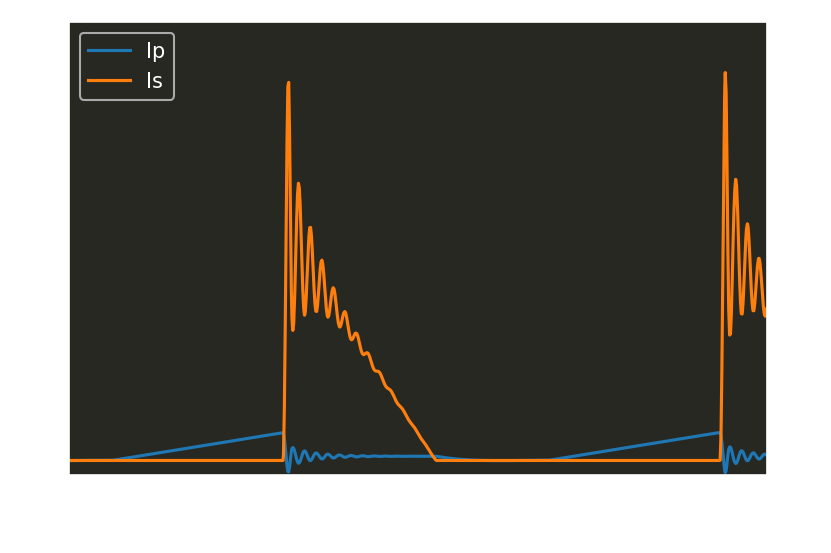

In [24]:
plt.figure(dpi=150)
simulation.plot(y="Ip") # plt.plot(simulation.df["t"], simulation.df["Ip"])
simulation.plot(y="Is")
plt.xlim(290e-6, 300e-6); plt.ylim(-10, 300); plt.legend(["Ip", "Is"]); plt.xlabel("time (s)");

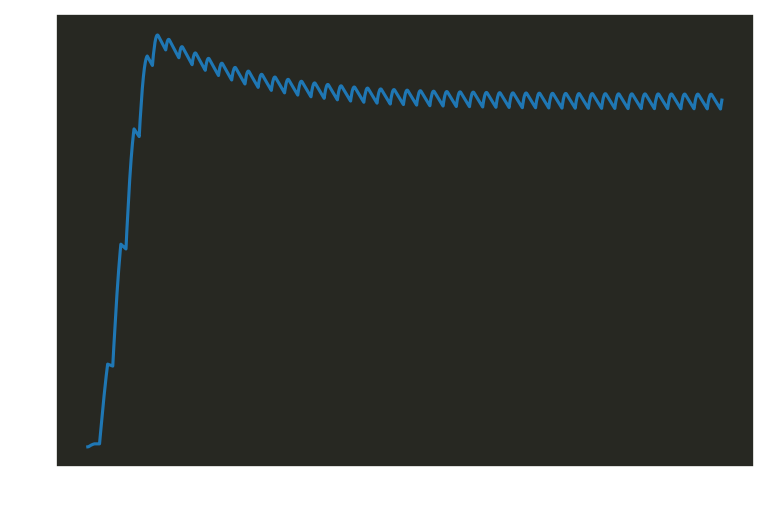

In [25]:
plt.figure(dpi=150)
simulation.plot(y="Vout");
# plt.xlim(290e-6, 300e-6); plt.ylim(-10, 300); plt.legend(["Ip", "Is"]); plt.xlabel("time (s)");

# References
https://www.monolithicpower.com/en/how-to-design-a-flyback-converter-in-seven-steps